In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay

In [15]:
file_path = 'C:\\Users\\Admin\\Data Science\\ML\\churan data\\Preprocessed_data.csv'
data = pd.read_csv(file_path)
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [16]:
X = data.drop('Customer Status',axis=1)

In [17]:
y = data['Customer Status']

In [18]:
X.shape,y.shape

((4835, 30), (4835,))

In [21]:
# test size = 0.2 , train data 80% and test data 20%
# Random state = 42
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=42,
                                                 test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [22]:
from scipy import stats
selcted_columns = ['Number of Dependents','Avg Monthly GB Download','Total Refunds'
                   ,'Total Extra Data Charges','Total Long Distance Charges','Total Revenue']
z_scores = np.abs(stats.zscore(X_train[selcted_columns]))
threshold = 3
outlier_indices  =np.where(z_scores>threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])
X_train.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
432,1,31,0,0,33.977468,-118.445475,0,56,0,37.99,1,2,24,1,0,0,1,1,1,1,1,0,1,1,105.35,5794.45,0.0,0,2127.44,7921.89
4135,1,21,1,0,33.723579,-118.005441,4,66,0,7.67,1,1,69,0,0,0,1,0,1,1,1,0,0,0,63.85,4264.60,0.0,0,506.22,4770.82
289,1,41,0,1,34.007353,-118.033683,0,12,4,27.07,0,0,29,1,0,0,0,1,1,1,1,0,1,2,69.85,837.50,0.0,0,324.84,1162.34
2692,0,42,1,0,37.441931,-121.878502,1,69,0,37.20,1,2,27,0,1,1,0,1,1,1,1,0,1,0,103.95,7446.90,0.0,0,2566.80,10013.70
4110,0,32,1,0,33.324900,-114.758334,0,57,2,12.19,1,2,16,1,0,0,0,1,1,1,1,0,1,0,-3.00,5497.05,0.0,0,694.83,6191.88


In [25]:
#model develop
#predications
#evaluation
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
ydt_pred = dtree.predict(X_test)
print(ydt_pred[:10])
print(y_test.values[:10])

[1 0 1 0 1 0 1 1 0 1]
[0 1 1 0 0 0 0 0 0 1]


In [28]:
acc_dt = round(accuracy_score(y_test,ydt_pred),2)
acc_dt

0.74

In [29]:
confusion_matrix(y_test,ydt_pred)

array([[208, 120],
       [128, 511]], dtype=int64)

In [32]:
tn,fp,fn,tp = confusion_matrix(y_test,ydt_pred).ravel()

In [33]:
print(tn)
print(fp)
print(fn)
print(tp)

208
120
128
511


In [34]:
print(accuracy_score(y_test,ydt_pred))
print(precision_score(y_test,ydt_pred))
print(recall_score(y_test,ydt_pred))
print(f1_score(y_test,ydt_pred))

0.7435367114788004
0.8098256735340729
0.7996870109546166
0.8047244094488188


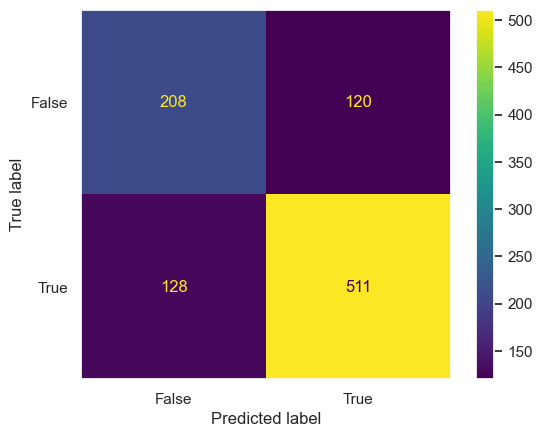

In [35]:
cmt=confusion_matrix(y_test,ydt_pred)
ConfusionMatrixDisplay(cmt,display_labels=[False,True]).plot()
plt.grid(False)

In [36]:
ydt_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [37]:
dtree.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [38]:
# we need to extract only class-1 prob
ydt_pred_prob = dtree.predict_proba(X_test)[:,1]
roc_curve(y_test,ydt_pred_prob)

(array([0.        , 0.36585366, 1.        ]),
 array([0.        , 0.79968701, 1.        ]),
 array([inf,  1.,  0.]))

In [39]:
ydt_pred = dtree.predict(X_test)
accuracy_score(y_test,ydt_pred)

0.7435367114788004

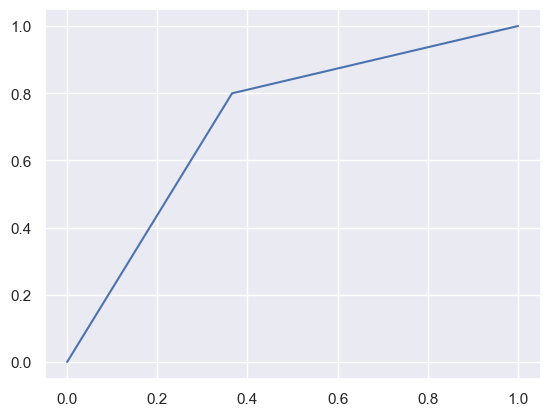

In [40]:
ydt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,ydt_pred_prob)
plt.plot(fpr,tpr)

accuracy is 0.74
Precsion is 0.81
recall is 0.81
f1 score is  0.81
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       328
           1       0.81      0.81      0.81       639

    accuracy                           0.74       967
   macro avg       0.72      0.71      0.71       967
weighted avg       0.74      0.74      0.74       967



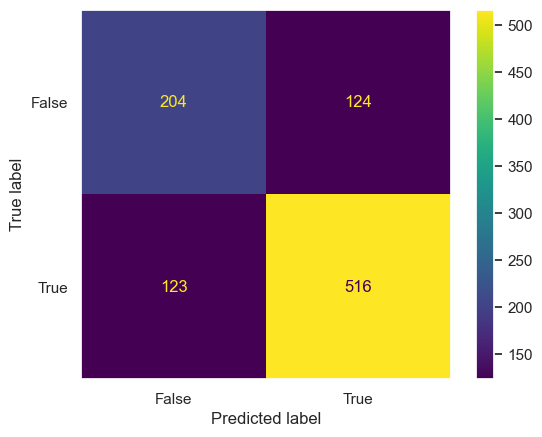

True Negatve is 204
False Positive is  124
False Negative 123
True Positive 516


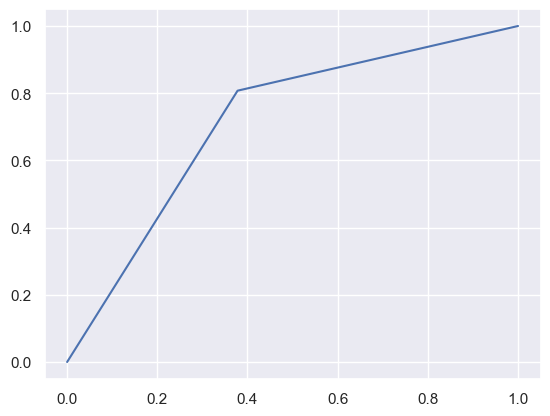

In [44]:
# Writing the above all code together
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# ============================Ste-5 : Predictions =============
ydt_pred = dtree.predict(X_test)
# ============================= Step-6 : Metrics ================
acc_dt = round(accuracy_score(y_test,ydt_pred),2)
prec_dt = round(precision_score(y_test,ydt_pred),2)
recall_dt =round(recall_score(y_test,ydt_pred),2)
f1_dt = round(f1_score(y_test,ydt_pred),2)

print('accuracy is',acc_dt)
print('Precsion is',prec_dt)
print('recall is',recall_dt)
print('f1 score is ',f1_dt)
print(classification_report(y_test,ydt_pred))
# ===================================== Step-7 Confision Matrix ==========
cmt = confusion_matrix(y_test,ydt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid()
plt.show()


tn,fp,fn,tp = confusion_matrix(y_test,ydt_pred).ravel()
print('True Negatve is',tn)
print('False Positive is ',fp)
print('False Negative',fn)
print('True Positive',tp)


# ======================================== Step-8 : ROC-AUC curve ===========
ydt_pred_prob = dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold= roc_curve(y_test,ydt_pred_prob)
plt.plot(fpr,tpr)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.77
Precision is  0.81
Recall is  0.84
f1 score is  1


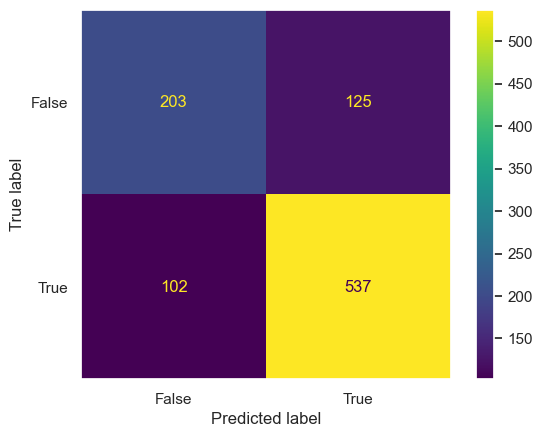

True Negative: 203
False Positive: 125
False Negative : 102
True Positive : 537


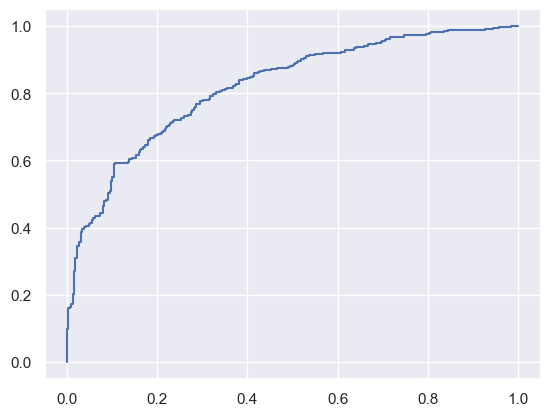

In [46]:
# Logistic Regressoin
from sklearn.linear_model import LogisticRegression
logtree = LogisticRegression()
logtree.fit(X_train,y_train)

# ================================== Step-5 : Predictions ==========
ylog_pred =logtree.predict(X_test)

# =========================== Step-6 : Metrics ==========
acc_log = round(accuracy_score(y_test,ylog_pred),2)
prec_log = round(precision_score(y_test,ylog_pred),2)
recall_log = round(recall_score(y_test,ylog_pred),2)
f1_log = round(f1_score(y_test,ylog_pred))
print('Accuracy is ',acc_log)
print('Precision is ',prec_log)
print('Recall is ',recall_log)
print('f1 score is ',f1_log)

# ============================ Step-7 : Confusion Matrix ========
cmt = confusion_matrix(y_test,ylog_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp = confusion_matrix(y_test,ylog_pred).ravel()
print('True Negative:',tn)
print('False Positive:',fp)
print('False Negative :',fn)
print('True Positive :',tp)
# ============================ Steo-8 : ROC-AUC curve ======
ylog_pred_prob = logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,ylog_pred_prob)
plt.plot(fpr,tpr)
plt.show()

Accuracy is  0.74
Precison is  0.86
Recall is 0.72
f1_score 0.78


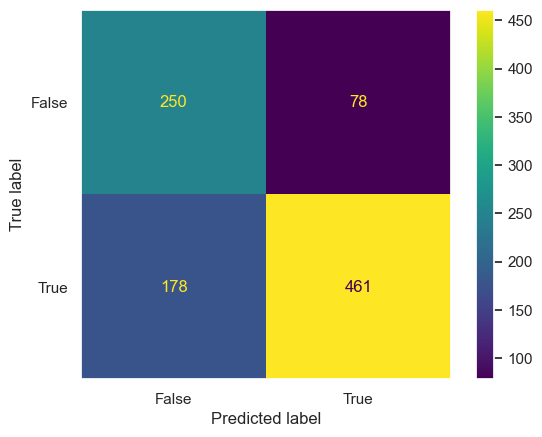

True Negative :  250
Flase Positive :  78
False Negative : 178
True Postive :  461


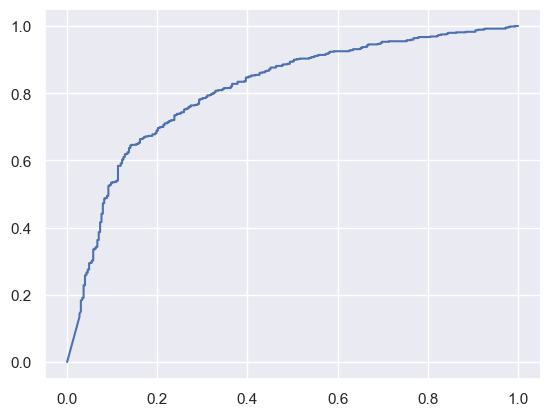

In [50]:
# Naive Bayes
# ======================== Step-4 : Train the model ==
from sklearn.naive_bayes import GaussianNB
nbtree = GaussianNB()
nbtree.fit(X_train,y_train)

# ===================== Step-5 : Predictions ===========
ynb_pred = nbtree.predict(X_test)
# ===================== Step-6 : Metrices ===================
acc_nb = round(accuracy_score(y_test,ynb_pred),2)
prec_nb = round(precision_score(y_test,ynb_pred),2)
rec_nb = round(recall_score(y_test,ynb_pred),2)
f1_nb = round(f1_score(y_test,ynb_pred),2)
print('Accuracy is ',acc_nb)
print('Precison is ',prec_nb)
print('Recall is',rec_nb)
print('f1_score',f1_nb)
# ========================= Step-7 : Confusion matirx ======== 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt = confusion_matrix(y_test,ynb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid()
plt.show()



tn,fp,fn,tp = confusion_matrix(y_test,ynb_pred).ravel()
print('True Negative : ',tn)
print('Flase Positive : ',fp)
print('False Negative :',fn)
print("True Postive : ",tp)


# ====================================Step-9 : ROC-AUC : curve ======
ynb_pred_prob = nbtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,ynb_pred_prob)
plt.plot(fpr,tpr)
plt.show()

Accuracy is  0.73
Precision is  0.77
Recall is  0.85
F1 score  0.81


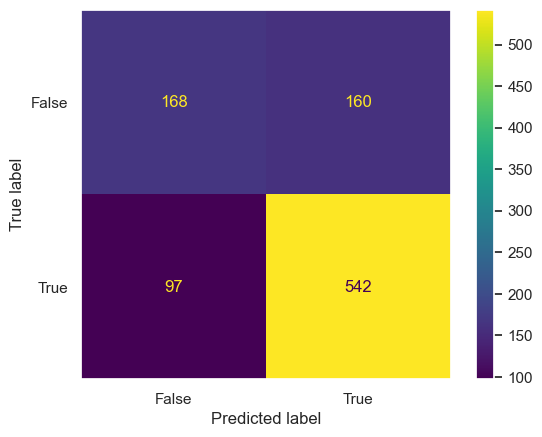

True Negative :  168
Flase Positive :  160
False Negative :  97
True Positive :  542


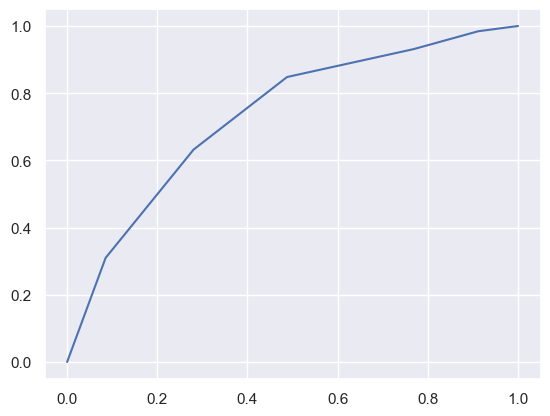

In [52]:
# KNN
# =================== Step-4: train the model ====
from sklearn.neighbors import KNeighborsClassifier
knntree = KNeighborsClassifier()
knntree.fit(X_train,y_train)

# ================== Step-5 : Predictiond ====

yknn_pred = knntree.predict(X_test)

# ================== Step-6 : Metrics =============
acc_knn = round(accuracy_score(y_test,yknn_pred),2)
prec_knn = round(precision_score(y_test,yknn_pred),2)
rec_knn = round(recall_score(y_test,yknn_pred),2)
f1_knn = round(f1_score(y_test,yknn_pred),2)
print('Accuracy is ',acc_knn)
print('Precision is ',prec_knn)
print('Recall is ',rec_knn)
print('F1 score ',f1_knn)


# ===================== Step-7 :Confusion Metrix =====
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt =confusion_matrix(y_test,yknn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid()
plt.show()



tn,fp,fn,tp = confusion_matrix(y_test,yknn_pred).ravel()

print('True Negative : ',tn)
print('Flase Positive : ',fp)
print('False Negative : ',fn)
print('True Positive : ',tp)

# ======================== Step -8 : ROC-AUC curve ===

yknn_pred_prob = knntree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,yknn_pred_prob)
plt.plot(fpr,tpr)
plt.show()

Accuracy is  0.81
Precsion is  0.83
Recall is 0.88
F1 Score  0.86


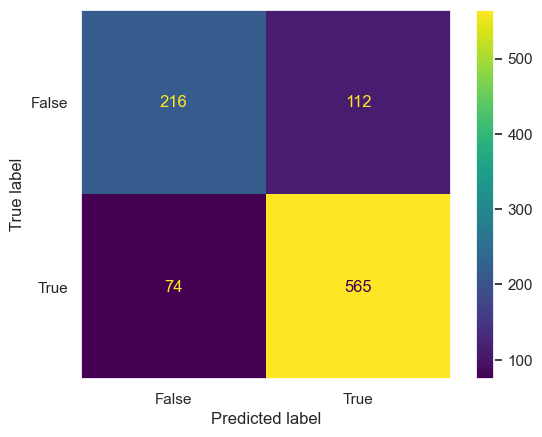

True Negative is  216
False Positive is  112
False Nehative is  74
True Ppsitive is 565


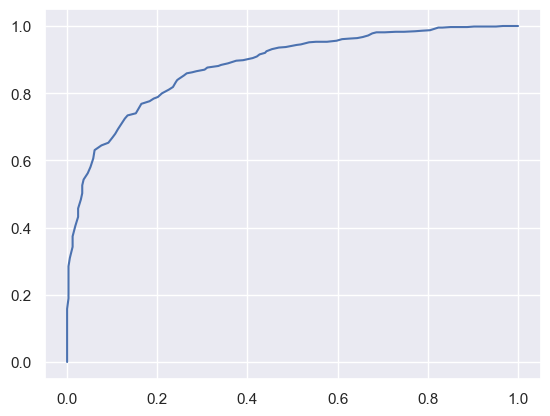

In [55]:
# Random Forest
# ========================== Step-4 : Train the model  =====
from sklearn.ensemble import RandomForestClassifier
rftree = RandomForestClassifier()
rftree.fit(X_train,y_train)

# ========================= Step-5 : Predictions ====
yrf_pred = rftree.predict(X_test)

# ========================== Step-6 : Metrices =========
acc_rf = round(accuracy_score(y_test,yrf_pred),2)
prec_rf = round(precision_score(y_test,yrf_pred),2)
recall_rf = round(recall_score(y_test,yrf_pred),2)
f1_rf = round(f1_score(y_test,yrf_pred),2)

print('Accuracy is ',acc_rf)
print('Precsion is ',prec_rf)
print('Recall is',recall_rf)
print('F1 Score ',f1_rf)


#====================== Step-7 : Confusion Matrix ======
cmt = confusion_matrix(y_test,yrf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid()
plt.show()



tn,fp,fn,tp = confusion_matrix(y_test,yrf_pred).ravel()


print('True Negative is ',tn)
print('False Positive is ',fp)
print('False Nehative is ',fn)
print('True Ppsitive is',tp)

# ========================== Step-8 : ROC-AUC curve ==========
yrf_pred_prob = rftree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,yrf_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [56]:
dict = {'Accuraacy':[acc_dt,acc_log,acc_nb,acc_knn,acc_rf],
        'Precision':[prec_dt,prec_log,prec_nb,prec_knn,prec_rf],
        'Recall':[recall_dt,recall_log,rec_nb,rec_knn,recall_rf],
        'F1 Score': [f1_dt,f1_log,f1_nb,f1_knn,f1_rf]}
pd.DataFrame(dict,index=['DT','LR','NB','KNN','Random Forest'])

,Accuraacy,Precision,Recall,F1 Score
DT,0.74,0.81,0.81,0.81
LR,0.77,0.81,0.84,1.00
NB,0.74,0.86,0.72,0.78
KNN,0.73,0.77,0.85,0.81
Random Forest,0.81,0.83,0.88,0.86


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.77
Precision is  0.81
Recall is  0.84
f1 score is  0.83


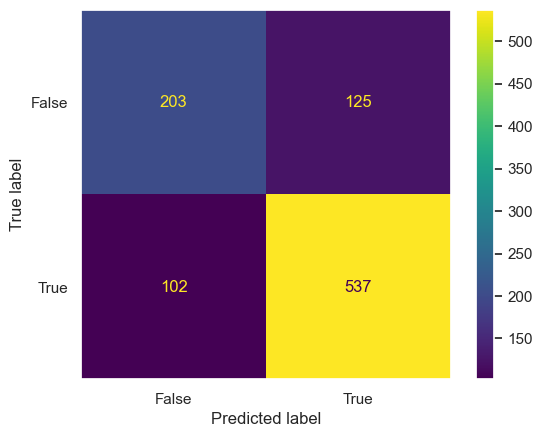

True Negative: 203
False Positive: 125
False Negative : 102
True Positive : 537


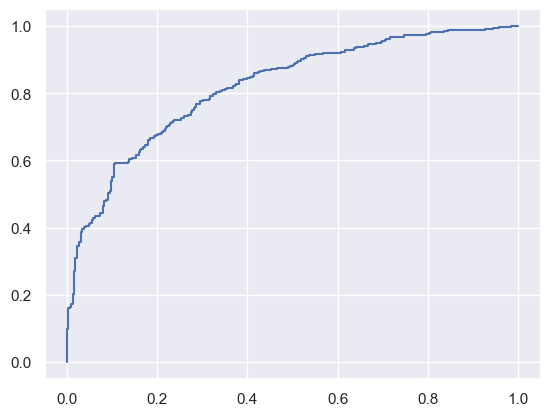

In [57]:
# Logistic Regressoin
from sklearn.linear_model import LogisticRegression
logtree = LogisticRegression()
logtree.fit(X_train,y_train)

# ================================== Step-5 : Predictions ==========
ylog_pred =logtree.predict(X_test)

# =========================== Step-6 : Metrics ==========
acc_log = round(accuracy_score(y_test,ylog_pred),2)
prec_log = round(precision_score(y_test,ylog_pred),2)
recall_log = round(recall_score(y_test,ylog_pred),2)
f1_log = round(f1_score(y_test,ylog_pred),2)
print('Accuracy is ',acc_log)
print('Precision is ',prec_log)
print('Recall is ',recall_log)
print('f1 score is ',f1_log)

# ============================ Step-7 : Confusion Matrix ========
cmt = confusion_matrix(y_test,ylog_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmt,
                              display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp = confusion_matrix(y_test,ylog_pred).ravel()
print('True Negative:',tn)
print('False Positive:',fp)
print('False Negative :',fn)
print('True Positive :',tp)
# ============================ Steo-8 : ROC-AUC curve ======
ylog_pred_prob = logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,ylog_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [58]:
dict = {'Accuraacy':[acc_dt,acc_log,acc_nb,acc_knn,acc_rf],
        'Precision':[prec_dt,prec_log,prec_nb,prec_knn,prec_rf],
        'Recall':[recall_dt,recall_log,rec_nb,rec_knn,recall_rf],
        'F1 Score': [f1_dt,f1_log,f1_nb,f1_knn,f1_rf]}
pd.DataFrame(dict,index=['DT','LR','NB','KNN','Random Forest'])

,Accuraacy,Precision,Recall,F1 Score
DT,0.74,0.81,0.81,0.81
LR,0.77,0.81,0.84,0.83
NB,0.74,0.86,0.72,0.78
KNN,0.73,0.77,0.85,0.81
Random Forest,0.81,0.83,0.88,0.86
